In [1]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import math
# import mediapipe as mp
import joblib

/home/jestin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
jpg_files = glob.glob(os.path.join(folder_path, "*.png"))
print(f"Found {len(jpg_files)} .png files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)

    pickle_name = image_name[0:-7] + "height.pkl"
    
    try:
        with open(pickle_name, 'rb') as file:
            loaded_data = pickle.load(file)
        # print("Loaded data:", loaded_data)
        # print(loaded_data["height_m"].shape)
        # print(type(loaded_data["height_m"]))
    except FileNotFoundError:
        print(f"Error: The file {pickle_name} was not found.")
    except pickle.PicklingError:
        print("Error: Failed to load the pickle file.")

    image = cv2.imread(os.path.join(folder_path, image_name))
    # print("Image:", image_name, "Shape:", image.shape)
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_bgr": image,
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_height": loaded_data["height_m"],
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    if i >= 10:
        break
    #       # Wait for a key press indefinitely
   
    

# face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
# eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
# mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
# nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
# profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
# left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
# right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))


# # Check if classifiers loaded successfully
# classifiers = [face_cascade, eye_cascade, mouth_cascade, nose_cascade, 
#               profileface_cascade, left_ear_cascade, right_ear_cascade]
# if any(c.empty() for c in classifiers):
#     print("Error: One or more cascade classifiers failed to load")


Found 9 .png files in /home/jestin/AMME5710_Major/src/stereo

Processing jestin_3_rgb.png...

Processing jestin_4_rgb.png...

Processing jestin_5_rgb.png...

Processing jestin_7_rgb.png...

Processing jestin_6_rgb.png...

Processing jestin_8_rgb.png...

Processing jestin_2_rgb.png...

Processing jestin_1_rgb.png...

Processing jestin_9_rgb.png...


In [3]:
# ------------------------------------------------------------------
# 1. Define where the cascade XML files live
# ------------------------------------------------------------------
# Option A – same folder as this script (recommended if you placed them there)
cascade_dir = os.getcwd()              # e.g. /home/jestin/AMME5710_Major/src/stereo

# Option B – a dedicated sub-folder (uncomment if you prefer)
# cascade_dir = os.path.join(os.path.dirname(__file__), 'cascades')

# ------------------------------------------------------------------
# 2. Helper to load a cascade with a clear error message
# ------------------------------------------------------------------
def load_cascade(name):
    path = os.path.join(cascade_dir, name)
    if not os.path.isfile(path):
        print(f"ERROR: Cascade file not found → {path}")
        return cv2.CascadeClassifier()      # returns an empty classifier
    clf = cv2.CascadeClassifier(path)
    if clf.empty():
        print(f"ERROR: Failed to load cascade → {path}")
    else:
        print(f"Loaded: {name}")
    return clf

# ------------------------------------------------------------------
# 3. Load every classifier
# ------------------------------------------------------------------
face_cascade       = load_cascade('haarcascade_frontalface_default.xml')
eye_cascade        = load_cascade('haarcascade_eye.xml')
mouth_cascade      = load_cascade('haarcascade_mcs_mouth.xml')
nose_cascade       = load_cascade('haarcascade_mcs_nose.xml')
profileface_cascade= load_cascade('haarcascade_profileface.xml')
left_ear_cascade   = load_cascade('haarcascade_mcs_leftear.xml')
right_ear_cascade  = load_cascade('haarcascade_mcs_rightear.xml')

# ------------------------------------------------------------------
# 4. Final sanity check
# ------------------------------------------------------------------
classifiers = [
    ('Face',          face_cascade),
    ('Eye',           eye_cascade),
    ('Mouth',         mouth_cascade),
    ('Nose',          nose_cascade),
    ('Profile Face',  profileface_cascade),
    ('Left Ear',      left_ear_cascade),
    ('Right Ear',     right_ear_cascade),
]

failed = [name for name, clf in classifiers if clf.empty()]
if failed:
    raise RuntimeError(f"Cascade loading failed for: {', '.join(failed)}")
else:
    print("\nAll cascade classifiers loaded successfully.\n")

Loaded: haarcascade_frontalface_default.xml
Loaded: haarcascade_eye.xml
Loaded: haarcascade_mcs_mouth.xml
Loaded: haarcascade_mcs_nose.xml
Loaded: haarcascade_profileface.xml
Loaded: haarcascade_mcs_leftear.xml
Loaded: haarcascade_mcs_rightear.xml

All cascade classifiers loaded successfully.



In [4]:
# head = heads["jestin_1_rgb.png"]
# head = heads["jestin_2_rgb.png"]
head = heads["jestin_3_rgb.png"]
# head = heads["jestin_4_rgb.png"]
# head = heads["jestin_5_rgb.png"]
# head = heads["jestin_6_rgb.png"]
# head = heads["jestin_7_rgb.png"]
# head = heads["jestin_8_rgb.png"]
# head = heads["jestin_9_rgb.png"]


In [5]:


img1 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
img2 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
height_m = head["im_height"].copy()

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No frontal face detected, trying profile face detector")
    faces = profileface_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No faces detected")
    # return

arr = height_m.copy().astype(float)
rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(arr[i, j]):
            neighbors = []
            # 4-connectivity: up, down, left, right
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < rows and 0 <= nj < cols and not np.isnan(arr[ni, nj]):
                    neighbors.append(arr[ni, nj])
            if neighbors:
                arr[i, j] = np.mean(neighbors)
height_m = arr

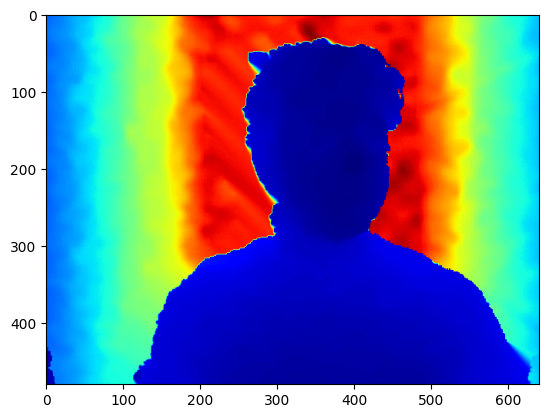

In [6]:
plt.imshow(height_m, cmap='jet')

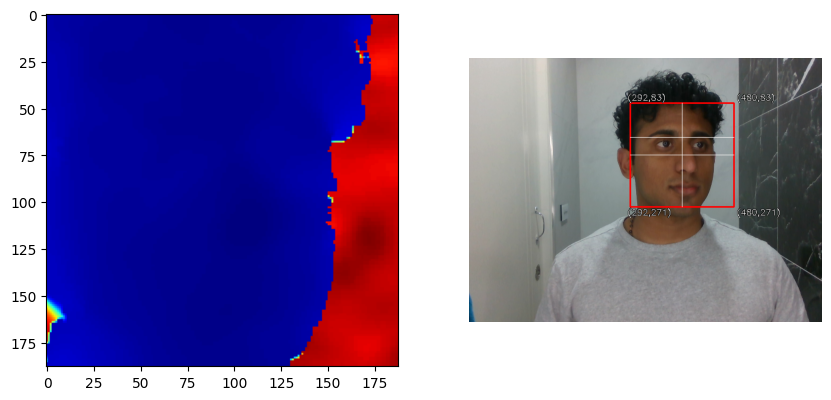

In [7]:
x, y, w, h = faces[0]

# Draw rectangle around face
cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Annotate corners with coordinates
tl = f"({x},{y})"
tr = f"({x+w},{y})"
bl = f"({x},{y+h})"
br = f"({x+w},{y+h})"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness = 1
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (255, 255, 255), thickness)

# Extract ROI for facial features
roi_gray = gray[y:y+h, x:x+w]
roi_height = height_m[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
nose = nose_cascade.detectMultiScale(roi_gray)

features = {'face': (x, y, w, h)}

# Draw reference lines
cv2.line(img2, (x + int(w/2), y), (x + int(w/2), y + h), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/3)), (x + w, y + int(h/3)), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/2)), (x + w, y + int(h/2)), (255, 255, 255), 1)


fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(roi_height, cmap='jet')
plt.subplot(122)
plt.imshow(img2)


# plt.imshow(img2)
plt.axis('off')
plt.show()


a left eye detected
a right eye detected
Right eye detected at: (418, 159)
a left eye detected
Left eye is in upper 3/5 of face
Left eye detected at: (352, 156)


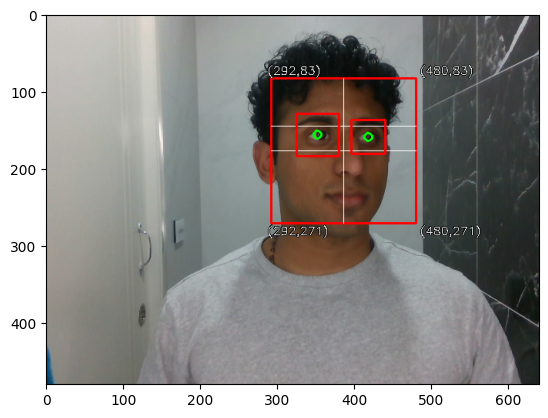

In [8]:
exp = 10

for (ex, ey, ew, eh) in eyes:
    center = (int(x + ex + ew/2), int(y + ey + eh/2))

    if center[0] < x + w/2:
        print("a left eye detected")
        if center[1] < y + 3*h/5:
            print("Left eye is in upper 3/5 of face")
            if 'eye_left' in features:
                print("Multiple left eyes detected, skipping")
                continue

            left_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            left_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]

            cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)

            left_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            features['eye_left'] = [center[0], center[1], left_eye_height]
            cv2.circle(img2, center, 5, (0, 255, 0), 2)
            print("Left eye detected at:", center)
        
    if center[0] > x + w/2:
        print("a right eye detected")

        if center[1] < y + 3*h/5:
            if 'eye_right' in features:
                print("Multiple right eyes detected, skipping")
                continue
            
            right_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            right_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]
            
            right_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)
            features['eye_right'] = [center[0], center[1], right_eye_height]
            cv2.circle(img2, center, 5, (0, 255, 0), 2)
            print("Right eye detected at:", center)


plt.imshow(img2)





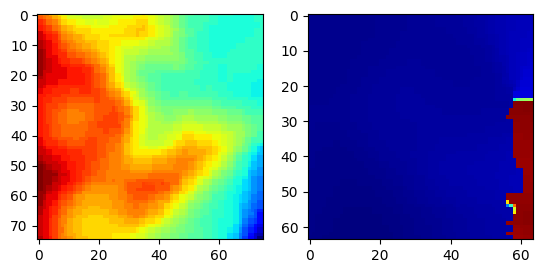

In [9]:
plt.subplot(122)
plt.imshow(right_eye_height_map, cmap='jet')
plt.subplot(121)
plt.imshow(left_eye_height_map, cmap='jet')

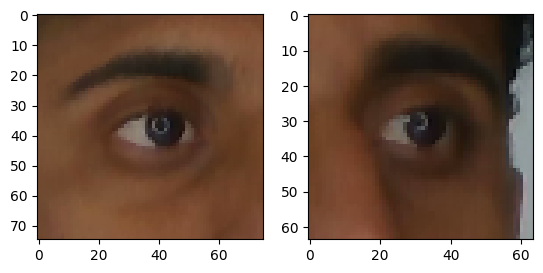

In [10]:
plt.subplot(122)
plt.imshow(right_eye_region, cmap='jet')
plt.subplot(121)
plt.imshow(left_eye_region, cmap='jet')

In [11]:
# right_eye_region_gray = cv2.equalizeHist(cv2.cvtColor(right_eye_region, cv2.COLOR_RGB2GRAY))
# left_eye_region_gray = cv2.equalizeHist(cv2.cvtColor(left_eye_region, cv2.COLOR_RGB2GRAY))

# # left eye processing
# thresh_left = cv2.threshold(
#     left_eye_region_gray, 0, 255, 
#     cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
# ) 

# # Morphological operations to clean up
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# thresh_left = cv2.morphologyEx(thresh_left, cv2.MORPH_CLOSE, kernel, iterations=2)
# thresh_left = cv2.morphologyEx(thresh_left, cv2.MORPH_OPEN, kernel, iterations=1)

# # left eye processing

# # thresh_right = cv2.adaptiveThreshold(
# #     right_eye_region_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
# #     cv2.THRESH_BINARY_INV, 11, 2
# # )

# thresh_right = cv2.threshold(
#     right_eye_region_gray, 0, 255, 
#     cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
# ) 
# # Morphological operations to clean up
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# thresh_right = cv2.morphologyEx(thresh_right, cv2.MORPH_CLOSE, kernel, iterations=2)
# thresh_right = cv2.morphologyEx(thresh_right, cv2.MORPH_OPEN, kernel, iterations=1)



# plt.subplot(122)
# plt.imshow(thresh_right, cmap='gray')
# plt.subplot(121)
# plt.imshow(thresh_left, cmap='gray')

Tip of Nose detected at: 15 27
Nose detected at: (395, 192)


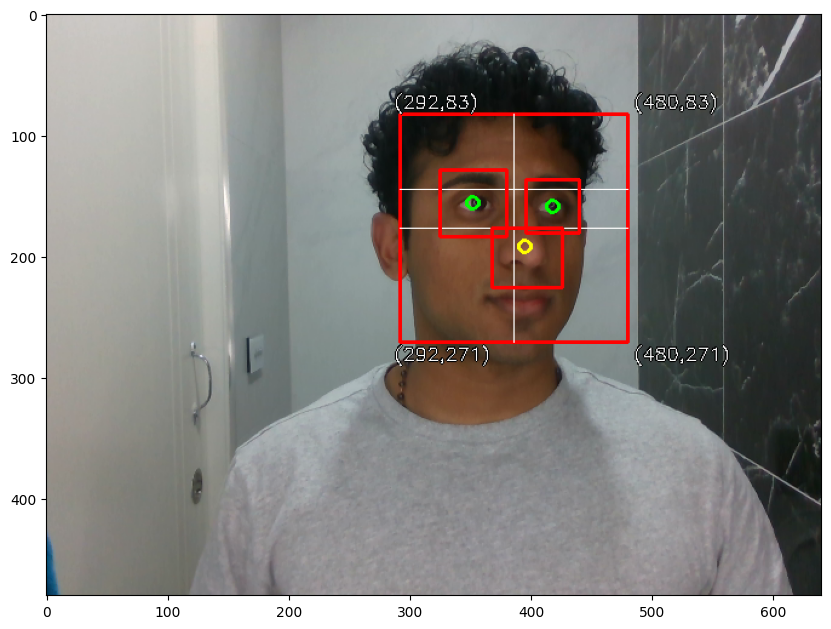

In [12]:
for (nx, ny, nw, nh) in nose:
    nose_center = (int(x + nx + nw/2), int(y + ny + nh/2))
    # Verify nose position relative to eyes
    if ('eye_left' in features and 'eye_right' in features and
        nose_center[1] > features['eye_left'][1] and
        nose_center[1] > features['eye_right'][1] and
        nose_center[0] > features['eye_left'][0] and
        nose_center[0] < features['eye_right'][0]):
        cv2.rectangle(img2, (x + nx, y + ny), (x + nx + nw, y + ny + nh), (255, 0, 0), 2)
        # cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        # print("Nose detected at:", nose_center)
        # features['nose'] = nose_center

        
        # Extract nose height map (correct coordinates)
        nose_height_map = height_m[y + ny:y + ny + nh, x + nx:x + nx + nw]

        expand = 35
        nose_height_map_wide = height_m[y + ny - expand : y + ny + nh + expand, x + nx - expand : x + nx + nw + expand]

        

        # print(nose_height_map[0:10, :])
        min_index = np.argmin(nose_height_map)  # Result: 1 (position of 1)
        row, col = np.unravel_index(min_index, nose_height_map.shape)  # Result: (0, 1)

        print("Tip of Nose detected at:", row, col)

        nose_depth = np.min(nose_height_map)

        nose_center = (int(x + nx + col), int(y + ny + row))
        cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        print("Nose detected at:", nose_center)
        features['nose'] = [nose_center[0], nose_center[1], nose_depth]

        fig = plt.figure(figsize=(10, 30))
        # plt.subplot(311)
        # plt.imshow(nose_height_map, cmap='jet')
        # plt.subplot(312)
        # plt.imshow(img2)
        # plt.subplot(313)
        # plt.imshow(nose_height_map_wide, cmap='jet')

        plt.imshow(img2)

    else:
        print("No nose detected or position constraints not met.")


395 192 0.5200000405311584


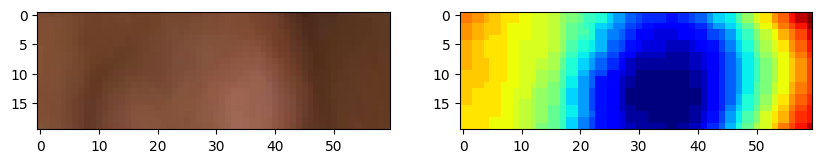

In [13]:
expand_vert = 10
expend_hori = 30

fig2 = plt.figure(figsize=(10, 30))

height_map_nose_and_cheek = height_m.copy()
plt.subplot(121)
plt.imshow(img1[features["nose"][1] - expand_vert : features["nose"][1] + expand_vert, features["nose"][0] - expend_hori : features["nose"][0] + expend_hori])
plt.subplot(122)
plt.imshow(height_map_nose_and_cheek[features["nose"][1] - expand_vert : features["nose"][1] + expand_vert, features["nose"][0] - expend_hori : features["nose"][0] + expend_hori], cmap='jet')
print(features["nose"][0], features["nose"][1], features["nose"][2])
# plt.imshow(img1)
# height_map_nose_and_cheek

# plt.imshow(height_map_nose_and_cheek, cmap='jet')

In [14]:
print(np.max(height_map_nose_and_cheek[features["nose"][1] - expand_vert : features["nose"][1] + expand_vert, features["nose"][0] - expend_hori : features["nose"][0] + expend_hori]))

0.5560000538825989


In [15]:
left_eye_vec = np.array(features["eye_left"])[:2]
right_ear_vec = np.array(features["eye_right"])[:2]
nose_vec = np.array([features["nose"]])[0][:2]

print(left_eye_vec)
print(right_ear_vec)
print(nose_vec)

print(features["eye_left"])

[352. 156.]
[418. 159.]
[395. 192.]
[352, 156, np.float64(0.550000011920929)]


In [16]:
eye_axis_vec = right_ear_vec - left_eye_vec

inter_eye_distance = np.linalg.norm(eye_axis_vec)
if inter_eye_distance == 0:
    raise ValueError("Left and right eye coordinates are identical.")

print(inter_eye_distance)

66.06814663663572


In [17]:
print(inter_eye_distance, " - inter eye distance along the axis of the eyes")
# Unit vector along the eye axis
eye_axis_unit = eye_axis_vec / inter_eye_distance

# Vector from left eye to nose
left_to_nose = nose_vec - left_eye_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(left_to_nose, eye_axis_unit)

print(nose_projection, " - distance from left eye to nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
print(normalized_position, " - inter eye distance to nose displacement ratio from left eye")

# Vector from left eye to nose
right_to_nose = nose_vec - right_ear_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(right_to_nose, eye_axis_unit)

print(nose_projection, " - distance from the right eye to the nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
print(normalized_position, " - inter eye distance to nose displacement ratio from right eye")

# Asymmetry ratio (optional alternative metric)
# Maps normalized_position = 0 → 1.0 (symmetric)
# Positive values indicate shift toward right eye
denom_left = 0.5 - normalized_position
denom_right = 0.5 + normalized_position
asymmetry_ratio = (denom_right / denom_left) if denom_left != 0 else float('inf')

66.06814663663572  - inter eye distance along the axis of the eyes
44.59032302211429  - distance from left eye to nose along the axis of the eyes
0.6749140893470792  - inter eye distance to nose displacement ratio from left eye
-21.477823614521444  - distance from the right eye to the nose along the axis of the eyes
-0.32508591065292103  - inter eye distance to nose displacement ratio from right eye


In [18]:
# print(eye_axis_unit)
# print(type(eye_axis_unit))

planar_vec = np.array([0, 1])

orth_vec = np.array([-eye_axis_unit[1], eye_axis_unit[0]])

dot_product = np.dot(orth_vec, planar_vec)

norm_planar = np.linalg.norm(planar_vec)
norm_orth = np.linalg.norm(orth_vec)


roll = np.arccos(np.clip(dot_product / (norm_planar * norm_orth), -1.0, 1.0))

roll_deg = np.degrees(roll)

print("head roll", roll_deg)

head roll 2.602562202499663


In [19]:
left_eye_vec = np.array([features["eye_left"][0], features["eye_left"][2]])
right_eye_vec = np.array([features["eye_right"][0], features["eye_right"][2]])

print(left_eye_vec)
print(right_eye_vec)



[352.           0.55000001]
[418.           0.56300002]


In [20]:
left_to_right_vec = right_ear_vec - left_eye_vec

planar_vec = np.array([1, 0])

# orth_vec = np.array([-eye_axis_unit[1], eye_axis_unit[0]])

dot_product = np.dot(left_to_right_vec, planar_vec)

norm_planar = np.linalg.norm(planar_vec)
norm_LR = np.linalg.norm(left_to_right_vec)


yaw = np.arccos(np.clip(dot_product / (norm_planar * norm_LR), -1.0, 1.0))

yaw_deg = np.degrees(yaw)

print("head yaw", yaw_deg)

head yaw 67.38655431403906


In [21]:
def GetHeadPose(image):
    

    original_image = image.copy()  # Keep a copy for annotation

    # Initialize MediaPipe Face Mesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

    # Detect face landmarks
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
        raise ValueError(f"No face detected in image {image_path}].")

    # 3D model points of facial landmarks (nose tip, chin, left eye, right eye, left mouth, right mouth)
    # Y-axis is positive upward
    model_points = np.array([
        [0.0, 0.0, 0.0],          # Nose tip
        [0.0, 63.6, -12.5],       # Chin
        [-43.3, -32.7, -26.0],    # Left eye left corner
        [43.3, -32.7, -26.0],     # Right eye right corner
        [-28.9, 28.9, -24.1],     # Left mouth corner
        [28.9, 28.9, -24.1]       # Right mouth corner
    ], dtype='double')

    # Get corresponding 2D image points from detected landmarks
    face_landmarks = results.multi_face_landmarks[0]
    image_points = np.array([
        [face_landmarks.landmark[1].x * image.shape[1], face_landmarks.landmark[1].y * image.shape[0]],    # Nose tip
        [face_landmarks.landmark[152].x * image.shape[1], face_landmarks.landmark[152].y * image.shape[0]],# Chin
        [face_landmarks.landmark[263].x * image.shape[1], face_landmarks.landmark[263].y * image.shape[0]],# Left eye left corner
        [face_landmarks.landmark[33].x * image.shape[1], face_landmarks.landmark[33].y * image.shape[0]],  # Right eye right corner
        [face_landmarks.landmark[287].x * image.shape[1], face_landmarks.landmark[287].y * image.shape[0]],# Left mouth corner
        [face_landmarks.landmark[57].x * image.shape[1], face_landmarks.landmark[57].y * image.shape[0]]   # Right mouth corner
    ], dtype='double')

    # Camera internals
    focal_length = image.shape[1]
    center = (image.shape[1] / 2, image.shape[0] / 2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype='double')

    dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion

    # SolvePnP to get rotation and translation vectors
    success, rotation_vector, translation_vector = cv2.solvePnP(
        model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE
    )
    if not success:
        raise RuntimeError("Head pose estimation failed.")

    # Convert rotation vector to rotation matrix (head to camera)
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    # Compute rotation matrix from camera to head frame (inverse = transpose)
    camera_to_head_rotation = rotation_matrix.T

    # Get Euler angles from rotation matrix
    sy = np.sqrt(rotation_matrix[0, 0] ** 2 + rotation_matrix[1, 0] ** 2)
    singular = sy < 1e-6

    if not singular:
        pitch = np.arctan2(rotation_matrix[2, 1], rotation_matrix[2, 2])
        yaw = np.arctan2(-rotation_matrix[2, 0], sy)
        roll = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])
    else:
        pitch = np.arctan2(-rotation_matrix[1, 2], rotation_matrix[1, 1])
        yaw = np.arctan2(-rotation_matrix[2, 0], sy)
        roll = 0

    # Convert radians to degrees
    pitch_deg = np.degrees(pitch)
    yaw_deg = np.degrees(yaw)
    roll_deg = np.degrees(roll)
    
    # y-axis is positive upward
    # x-axis is positive rightward
    # z-axis is positive forward
    angles = {'pitch': pitch_deg, 'yaw': yaw_deg, 'roll': roll_deg}

    # Mask non-head pixels to black using convex hull of detected face landmarks
    try:
        # Build array of landmark (x, y) points in image coordinates
        landmark_points = np.array([
            [lm.x * image.shape[1], lm.y * image.shape[0]] for lm in face_landmarks.landmark
        ], dtype=np.int32)

        # Compute convex hull over landmarks to get face region
        hull = cv2.convexHull(landmark_points)

        # Create mask and fill convex hull
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillConvexPoly(mask, hull, 255)

        # Apply mask: keep face pixels, set others to black
        masked_image = cv2.bitwise_and(original_image, original_image, mask=mask)
        original_image = masked_image
    except Exception as _e:
        # If anything fails, fall back to original image (do not stop execution)
        print(f"Warning: failed to mask non-head pixels: {_e}")

    # Annotate the image with Euler angles text
    cv2.putText(original_image, f'Pitch: {pitch_deg:.2f} deg', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(original_image, f'Yaw: {yaw_deg:.2f} deg', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(original_image, f'Roll: {roll_deg:.2f} deg', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Visualize the pose by projecting 3D axes onto the image
    axis_length = 50  # Length of axes lines in model units
    axes_points = np.array([
        [0, 0, 0],           # Origin (nose tip)
        [axis_length, 0, 0], # X-axis end
        [0, axis_length, 0], # Y-axis end
        [0, 0, axis_length]  # Z-axis end
    ], dtype='double')

    # Project axes points to 2D image
    imgpts, _ = cv2.projectPoints(axes_points, rotation_vector, translation_vector, camera_matrix, dist_coeffs)
    imgpts = np.int32(imgpts).reshape(-1, 2)

    nose_tip_2d = tuple(imgpts[0])  # Origin
    x_end = tuple(imgpts[1])
    y_end = tuple(imgpts[2])
    z_end = tuple(imgpts[3])

    # Draw axes: X (red), Y (green), Z (blue)
    cv2.line(original_image, nose_tip_2d, x_end, (0, 0, 255), 3)  # X-axis red
    cv2.line(original_image, nose_tip_2d, y_end, (0, 255, 0), 3)  # Y-axis green
    cv2.line(original_image, nose_tip_2d, z_end, (255, 0, 0), 3)  # Z-axis blue

    # Draw labels for axes
    cv2.putText(original_image, 'X', x_end, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.putText(original_image, 'Y', y_end, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(original_image, 'Z', z_end, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display or save the annotated image
    # if output_path:
    #     cv2.imwrite(output_path, original_image)
    #     print(f"Annotated image saved to {output_path}")
    # else:
    #     cv2.imshow('Annotated Head Pose', original_image)
    #     cv2.waitKey(0)
    #     cv2.destroyAllWindows()

    plt.imshow(original_image)

    # Return both Euler angles and the rotation matrix from camera to head frame
    return {
        'angles': angles,
        'camera_to_head_rotation': camera_to_head_rotation,

    }

In [22]:
GetHeadPose(img1)

NameError: name 'mp' is not defined

In [ ]:
print(features["nose"])
print(features["eye_left"])

nose_to_left_eye_depth = features["eye_left"][2] - features["nose"][2]
nose_to_right_eye_depth = features["eye_right"][2] - features["nose"][2]

print(nose_to_left_eye_depth)
print(nose_to_right_eye_depth)


In [ ]:
print(asymmetry_ratio)

if (asymmetry_ratio > 0):
    # turned to the right
    

In [ ]:
print(features)